0.6340876973694767
Mean Absolute Error (MAE): 9.50873604952337
Mean Squared Error (MSE): 590.857590176277
Root Mean Squared Error (RMSE): 24.30756240712501


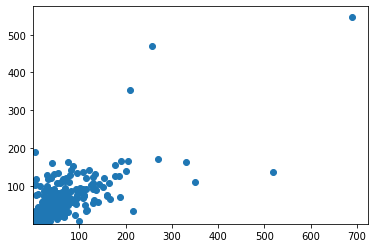

In [11]:
#-Read given dataframe first
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt


from sklearn.ensemble import BaggingRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, explained_variance_score, max_error, mean_squared_log_error, median_absolute_error, r2_score, mean_poisson_deviance, mean_gamma_deviance

 
df_fr_it_sw_eb = pd.read_csv('/Users/defne/Downloads/test_df_to_learn_RF.csv')
df_without_date = df_fr_it_sw_eb.iloc[:,1:]

 

df_without_date1 = df_without_date.reset_index(drop = True)

             

x = df_without_date1.iloc[:,2:]

y = df_without_date1['Cu_Obs']

xv = x.sample(frac = 0.2
             )      # x for validation (20%)

xx = x.drop(xv.index)          # x for training  (80%)

yv = y.loc[xv.index]           #y for validation (20%)

yx = y.drop(xv.index)          #y for training (80%)

 

regr = RandomForestRegressor(max_depth=200, random_state=666) ##6 and 125 need to be tuned

regr.fit(xx, yx)                #rf training with training data (80%)

y_tra = regr.predict(xx)

y_val = regr.predict(xv)

 

print(regr.score(xv, yv))

print('Mean Absolute Error (MAE):', mean_absolute_error(yv, y_val))

print('Mean Squared Error (MSE):', mean_squared_error(yv, y_val))

print('Root Mean Squared Error (RMSE):', mean_squared_error(yv, y_val, squared=False))

 

plt.figure()

plt.scatter(yv, y_val)

plt.xlim(0.1)
plt.ylim(0.1)

plt.show()

 